In [902]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt  
import pickle


In [903]:

df = pd.read_csv('diabetes.csv') 

In [904]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [905]:
df.shape

(768, 9)

In [906]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [907]:
df['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

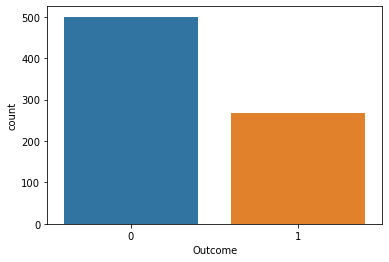

In [908]:
sns.countplot(x = 'Outcome',data = df)

In [909]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [910]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
#df['Age'] = df['Age'].replace(0,df['Age'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
#df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0,df['DiabetesPedigreeFunction'].mean())

In [911]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [912]:
#dividing dataset into features and outcome
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [913]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [914]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [915]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [916]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [917]:
#splitting training and testing 75%
from sklearn.model_selection import train_test_split

In [918]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.30,random_state=None)

In [919]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
612,7,168.0,88.0,42.000000,321.000000,38.2,0.787,40
108,3,83.0,58.0,31.000000,18.000000,34.3,0.336,25
699,4,118.0,70.0,20.536458,79.799479,44.5,0.904,26
486,1,139.0,62.0,41.000000,480.000000,40.7,0.536,21
21,8,99.0,84.0,20.536458,79.799479,35.4,0.388,50
...,...,...,...,...,...,...,...,...
425,4,184.0,78.0,39.000000,277.000000,37.0,0.264,31
749,6,162.0,62.0,20.536458,79.799479,24.3,0.178,50
210,2,81.0,60.0,22.000000,79.799479,27.7,0.290,25
581,6,109.0,60.0,27.000000,79.799479,25.0,0.206,27


In [920]:
Y_train

612    1
108    0
699    0
486    0
21     0
      ..
425    1
749    1
210    0
581    0
414    1
Name: Outcome, Length: 537, dtype: int64

In [921]:
#standardising data
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [922]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [923]:
X_train_std

array([[ 0.93109184,  1.55106896,  1.2593981 , ...,  0.81723578,
         0.90832522,  0.58470322],
       [-0.26008462, -1.26809445, -1.1919043 , ...,  0.24332966,
        -0.43046443, -0.71383123],
       [ 0.0377095 , -0.10726246, -0.21138334, ...,  1.74431489,
         1.25563872, -0.62726226],
       ...,
       [-0.55787873, -1.33442771, -1.02848414, ..., -0.72789607,
        -0.56701504, -0.71383123],
       [ 0.63329773, -0.40576211, -1.02848414, ..., -1.12521569,
        -0.81636832, -0.5406933 ],
       [-1.15346697,  0.55607011, -1.02848414, ...,  0.28747629,
         0.15729688, -1.06010708]])

In [924]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [925]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [926]:
Y_pred=lr.predict(X_test_std)

In [927]:
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [928]:
Y_test

637    0
626    0
503    0
589    0
598    1
      ..
738    0
434    0
341    0
360    1
524    0
Name: Outcome, Length: 231, dtype: int64

In [929]:
from sklearn.metrics import accuracy_score

In [930]:
accuracy_score(Y_test,Y_pred) * 100

77.92207792207793

In [931]:
#dECITION TREE
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy', random_state=0)

In [932]:
Y_pred=classifier.predict(X_train_std)
accuracy_score(Y_train,Y_pred)*100

76.72253258845437

In [933]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [934]:
Y_pred=dt.predict(X_test_std)

In [935]:
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [936]:
Y_test

637    0
626    0
503    0
589    0
598    1
      ..
738    0
434    0
341    0
360    1
524    0
Name: Outcome, Length: 231, dtype: int64

In [937]:
accuracy_score(Y_test,Y_pred)*100

74.45887445887446

In [938]:
#support vector machine
classifier = svm.SVC(kernel='linear')

In [939]:
classifier.fit(X_train_std,Y_train)

SVC(kernel='linear')

In [940]:
Y_pred=classifier.predict(X_test_std)

In [941]:
Y_pred


array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [942]:
Y_test

637    0
626    0
503    0
589    0
598    1
      ..
738    0
434    0
341    0
360    1
524    0
Name: Outcome, Length: 231, dtype: int64

In [943]:
accuracy_score(Y_test,Y_pred)*100

79.22077922077922

In [944]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test, Y_pred)  
cm

array([[135,  12],
       [ 36,  48]], dtype=int64)

In [945]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators= 10, criterion="entropy")


In [946]:
rf_model.fit(X_train_std,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [947]:
Y_pred=rf_model.predict(X_test_std)

In [948]:
Y_pred


array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [949]:
Y_test

637    0
626    0
503    0
589    0
598    1
      ..
738    0
434    0
341    0
360    1
524    0
Name: Outcome, Length: 231, dtype: int64

In [950]:
accuracy_score(Y_test,Y_pred)*100

75.32467532467533

In [951]:
#kmeans
import sklearn
from sklearn.cluster import KMeans
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X_train_std,Y_train)

KMeans(n_clusters=2, random_state=0)

In [952]:
Y_pred=KMeans_Clustering.predict(X_test_std)

In [953]:
Y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [954]:
Y_test

637    0
626    0
503    0
589    0
598    1
      ..
738    0
434    0
341    0
360    1
524    0
Name: Outcome, Length: 231, dtype: int64

In [955]:
accuracy_score(Y_test,Y_pred)*100

25.108225108225106

<AxesSubplot:>

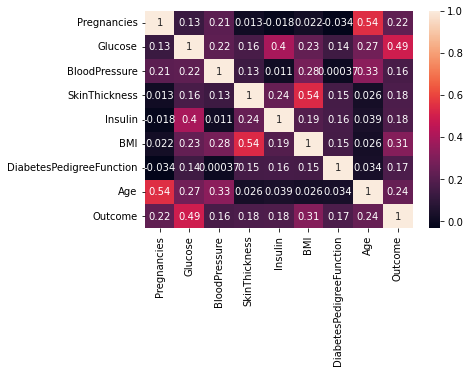

In [956]:
img=sns.heatmap(df.corr(), annot = True)
img

In [957]:
#new data with reduced features taken from heatmap
K = X.iloc[:, [0,1,2,3,5,6,7]].values
Z = df.iloc[:, 8].values

In [958]:
print(K)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [959]:
#new data splitting into test and train
K_train , K_test , Z_train , Z_test = train_test_split(K,Z,test_size=0.15,random_state=None)

In [960]:
#new data standardizing
std1=StandardScaler()
K_train_std=std1.fit_transform(K_train)
K_test_std=std1.transform(K_test)

In [961]:
#kmeans for new data reducing features to improve accuracy
KMeans_Clustering1 = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering1.fit(K_train_std,Z_train)

KMeans(n_clusters=2, random_state=0)

In [962]:
Y_pred=KMeans_Clustering1.predict(K_test_std)

In [963]:
Y_pred

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0])

In [964]:
accuracy_score(Z_test,Y_pred)*100

28.448275862068968

In [965]:
#testing new data with svm
classifier1 = svm.SVC(kernel='linear')

In [966]:
classifier1.fit(K_train_std,Z_train)

SVC(kernel='linear')

In [967]:
Y_pred=classifier1.predict(K_test_std)

In [968]:
Y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1], dtype=int64)

In [969]:
#we got better results without reducing features so sticking to the previous data 
accuracy_score(Z_test,Y_pred)*100

76.72413793103449

In [970]:
lr1=LogisticRegression()
lr1.fit(K_train_std,Z_train)


LogisticRegression()

In [971]:
Y_pred=lr1.predict(K_test_std)


In [972]:

accuracy_score(Z_test,Y_pred) * 100

77.58620689655173

In [973]:
rf_model1 = RandomForestClassifier()
rf_model1.fit(K_train_std,Z_train)
Y_pred=lr1.predict(K_test_std)
accuracy_score(Z_test,Y_pred) * 100

77.58620689655173

In [974]:
dt1=DecisionTreeClassifier()
dt1.fit(K_train_std,Z_train)
Y_pred=lr1.predict(K_test_std)
accuracy_score(Z_test,Y_pred) * 100

77.58620689655173

In [975]:
#predicting using best accuracy
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = std.transform(input_data_reshaped)
print(std_data)

prediction = rf_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.33550361  1.48473571 -0.04796318 -0.81380242  0.65042316 -1.00749136
   0.31462693  1.53696182]]
[1]
The person is diabetic


C:\Users\atulv\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [976]:
pickle.dump(classifier, open('classifier.pkl', 'wb'))
pickle.dump(std,open('std.pkl','wb'))
pickle.dump(rf_model,open('randomforest.pkl','wb') )
pickle.dump(lr,open('logistic.pkl','wb') )
pickle.dump(dt,open('decition.pkl','wb') )
